In [1]:
import pandas as pd
import numpy as np

# Reading the Data

In [2]:
df_boxoffice = pd.read_csv(r'C:\Users\hannah\Dropbox\Blogs\First Blog\boxofficeinfo\boxoffice2017_2019d.csv', encoding = 'ISO-8859-1')
df_trailer = pd.read_csv(r'C:\Users\hannah\Dropbox\Scrapy\movie_trailer\movie_trailer.csv', encoding='ISO-8859-1')

In [3]:
df_boxoffice.drop(['world_revenue', 'release_days'], axis=1, inplace=True)

In [4]:
df_boxoffice.shape

(2711, 9)

In [5]:
df_boxoffice.head()

,title,domestic_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_date
0,Avengers: Endgame,"$858,373,000",Walt Disney Studios Motion Pictures,"$357,115,007","4,662","$356,000,000",PG-13,"Action,Adventure,Drama,Sci-Fi","Apr 26, 2019"
1,Knives Out,"$164,655,243",Lionsgate,"$26,769,548","3,461","$40,000,000",PG-13,"Comedy,Crime,Drama,Mystery,Thriller","Nov 27, 2019"
2,Star Wars: Episode VIII - The Last Jedi,"$620,181,382",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi","Dec 15, 2017"
3,Aquaman,"$335,061,807",Warner Bros.,"$67,873,522","4,125",NaN,PG-13,"Action,Adventure,Fantasy,Sci-Fi","Dec 21, 2018"
4,Shazam!,"$140,371,656",Warner Bros.,"$53,505,326","4,217","$100,000,000",PG-13,"Action,Adventure,Comedy,Fantasy","Apr 5, 2019"


In [6]:
df_trailer.head()

,title,trailer,trailer_date,director
0,Brahms: The Boy II,Theatrical Trailer (2020),"February 12, 2020",William Brent Bell
1,The French Dispatch,Trailer (2020),"February 12, 2020",Wes Anderson
2,The Green Knight,Teaser Trailer (2020),"February 13, 2020",David Lowery
3,Antebellum,Teaser Trailer (2020),"November 21, 2019",Gerard Bush
4,The Secret: Dare to Dream,Trailer (2020),"February 13, 2020",Andy Tennant


In [7]:
df_trailer.shape

(25047, 4)

# Combining the Data

In [8]:
df_trailer['title'] = df_trailer['title'].str.replace('(\(2016\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2017\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2018\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2019\))', '')

df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2016\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2017\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2018\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2019\))', '')

df_trailer['title'] = df_trailer['title'].str.strip()
df_trailer['trailer'] = df_trailer['trailer'].str.strip()

In [9]:
multiple_directors = []
for name, group in df_trailer.groupby('title'):
    if len(group['director'].unique()) > 1:
        multiple_directors.append(name)
multiple_directors

['A Quiet Place',
 'A Star Is Born',
 'Aladdin',
 'American Violence',
 'Beast',
 'Beauty and the Beast',
 'Blaze',
 'Blood Money',
 'Blood Moon',
 'Borderline',
 'Breathe',
 'Burden',
 'Cargo',
 'Christine',
 'City of Joy',
 'Danger Close',
 'Delirium',
 'Disturbing the Peace',
 'Eden',
 'Escape Room',
 'Extinction',
 'Fallen',
 'Ghostland',
 'King Lear',
 'Legacy',
 'Life',
 'Little Women',
 'Long Shot',
 'Lucky',
 'Man Up',
 'Paradox',
 'Parallel',
 'Passage',
 'Polaroid',
 'Recovery',
 'Reset',
 'Resistance',
 'Rumble',
 'Ryde',
 'Spiral',
 'Split',
 'Tag',
 'The Basement',
 'The Boy',
 'The Chamber',
 'The Darkness',
 'The Guardians',
 'The House That Jack Built',
 'The Jungle Book',
 'The Kindergarten Teacher',
 'The King',
 'The Last Laugh',
 'The Lighthouse',
 'The Lion King',
 'The Little Mermaid',
 'The Lure',
 'The Messenger',
 'The Monster',
 'The Neighbor',
 'The Oath',
 'The Return',
 'The Stranger',
 'The Strongest Man',
 'The Surface',
 'The Tribe',
 'The Veil',
 'The W

In [10]:
for name, group in df_trailer.groupby('title'):
    if len(group['director'].unique()) > 1:
        df_trailer.drop(df_trailer[df_trailer['title']==name].index, inplace=True)

In [11]:
df_trailer[df_trailer['title']=='Avengers: Endgame']

,title,trailer,trailer_date,director
89,Avengers: Endgame,Blu-Ray Trailer,"June 26, 2019",Anthony Russo
1233,Avengers: Endgame,Trailer,"December 07, 2018",Anthony Russo
1395,Avengers: Endgame,Super Bowl TV Spot,"February 04, 2019",Anthony Russo
1439,Avengers: Endgame,Theatrical Trailer,"March 14, 2019",Anthony Russo
1461,Avengers: Endgame,TV Spot - Honor,"March 21, 2019",Anthony Russo
1463,Avengers: Endgame,Featurette - We Lost,"March 26, 2019",Anthony Russo
1478,Avengers: Endgame,Featurette - IMAX,"March 29, 2019",Anthony Russo
1488,Avengers: Endgame,Special Look Trailer,"April 02, 2019",Anthony Russo
1503,Avengers: Endgame,Featurette - Stakes,"April 07, 2019",Anthony Russo
1522,Avengers: Endgame,End is Near Trailer,"April 15, 2019",Anthony Russo


In [12]:
df_trailer = df_trailer[df_trailer['trailer']=='Trailer']
df_trailer['trailer_date'] = df_trailer['trailer_date'].astype('datetime64')
df_trailer = df_trailer.sort_values('trailer_date', ascending=True).drop_duplicates(subset=['title'], keep='first')

In [13]:
trailer_multiple = []
for name, group in df_trailer.groupby('title'):
    x,y = group.shape
    if x > 1:
        trailer_multiple.append(name)
print(len(trailer_multiple))

0


In [14]:
boxoffice_multiple = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if x > 1:
        boxoffice_multiple.append(name)
print(len(boxoffice_multiple))

223


In [15]:
multiple_app1 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['distributor'].unique()) > 1):
        multiple_app1.append(name)
print(len(multiple_app1))

21


In [16]:
multiple_app2 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['release_date'].unique()) > 1):
        multiple_app2.append(name)
print(len(multiple_app2))

35


In [17]:
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['distributor'].unique()) > 1):
        df_boxoffice.drop(df_boxoffice[df_boxoffice['title']==name].index, inplace=True)

In [18]:
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['release_date'].unique()) > 1):
        df_boxoffice.drop(df_boxoffice[df_boxoffice['title']==name].index, inplace=True)

#### Checking if there are any movies with the same names

In [19]:
multiple_app3 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x > 1):
        multiple_app3.append(name)

multiple_app4 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x > 1) & (len(group['domestic_revenue'].unique())==1):
        multiple_app4.append(name)
print('The number of movie titles with multiple entries:', len(multiple_app3))
print('The number of movies recorded multiple times:', len(multiple_app4))

The number of movie titles with multiple entries: 188
The number of movies recorded multiple times: 188


In [20]:
df_boxoffice = df_boxoffice.drop_duplicates(subset=['title'])
df_boxoffice.reset_index(drop=True, inplace=True)

In [21]:
df = pd.merge(df_boxoffice, df_trailer, how='inner', on = 'title')

In [22]:
df.shape

(1119, 12)

In [23]:
df_trailer[df_trailer['title'].str.contains('Incredibles')]

,title,trailer,trailer_date,director
3431,The Incredibles 2,Trailer,2018-02-15,Brad Bird


In [24]:
df_boxoffice[df_boxoffice['title'].str.contains('Incredibles')]

,title,domestic_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_date
2152,Incredibles 2,"$608,581,744",Walt Disney Studios Motion Pictures,"$182,687,905","4,410",NaN,PG,"Action,Adventure,Animation,Comedy,Family,Sci-Fi","Jun 15, 2018"


In [25]:
from fuzzywuzzy import fuzz

c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [26]:
name1 = 'Incredibles 2'
name2 = 'Incredibles 2'
fuzz.ratio(name1, name2)

100

In [27]:
name1 = 'Incredibles 2'
name2 = 'The Incredibles 2'
fuzz.ratio(name1, name2)

87

In [28]:
name1 = 'Cold Water'
name2 = 'Cold War'
fuzz.ratio(name1, name2)

89

--------------------------------------------------------------------------------------------------------------------

In [33]:
df_trailer['trailer_date'] = df_trailer['trailer_date'].astype('datetime64')

In [34]:
df_trailer.shape

(6086, 4)

In [35]:
df_trailer1 = df_trailer.loc[df_trailer['trailer_date'] > '20160101']

In [36]:
df_trailer1.shape

(5105, 4)

In [37]:
def matching_title(title1, title_list, min_score):
    max_score = -1
    max_title = ''
    for title2 in title_list:
        score = fuzz.ratio(title1,title2)
        if (score > min_score) & (score > max_score):
            max_title = title2
            max_score = score
    return(max_title)

In [40]:
df_boxoffice['title2'] =''

for i in df_boxoffice.index:
    title_old = df_boxoffice.loc[i,'title']
    title_new = matching_title(title_old, df_trailer1['title'], 85)
    df_boxoffice.loc[i, 'title2'] = title_new

In [41]:
df1 = pd.merge(df_boxoffice, df_trailer1, how='inner', left_on = 'title2', right_on = 'title')

In [42]:
df1.shape

(1250, 16)

In [47]:
df1.loc[df1['title_x']!=df1['title2']].head(20)

,title_x,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days,release_date,title2,title_y,trailer,trailer_date,director
10,Once Upon a Time... in Hollywood,"$142,502,728","$374,341,301",Sony Pictures Releasing,"$41,082,018","3,659","$90,000,000",R,"Comedy,Drama",220,2019-07-26,Once Upon a Time in Hollywood,Once Upon a Time in Hollywood,Trailer,2019-03-20,Quentin Tarantino
23,The Load,"$28,410","$28,410",Grasshopper Film,"$4,094",1,NaN,NaN,Drama,185,2019-08-30,The Land,The Land,Teaser Trailer,2016-05-06,Steven Caple Jr.
44,The Pact,"$2,488","$1,855,647",Sony Pictures Releasing,"$1,453",10,NaN,R,"Horror,Thriller",67,2018-10-26,The Pack,The Pack,Trailer,2016-01-14,Nick Robertson
52,Over the Limit,"$3,243","$3,243",Film Movement,"$1,402",1,NaN,NaN,"Documentary,Sport",446,2018-10-12,Over the limit,Over the limit,Trailer,2018-05-28,Marta Prus
53,Song Of Granite,"$16,182","$21,349",Oscilloscope,"$3,096",1,NaN,NaN,"Biography,Drama",412,2017-11-15,Song of Granite,Song of Granite,Trailer,2017-11-08,Pat Collins
54,Game Changers,"$3,142","$3,142",Ammo Content,"$3,142",1,NaN,NaN,Documentary,186,2018-06-29,The Game Changers,The Game Changers,Trailer,2018-05-09,Louie Psihoyos
56,Followers,"$3,350","$3,350",Cinedigm Entertainment Group,NaN,NaN,NaN,NaN,Thriller,284,2018-03-23,Follower,Follower,Trailer,2017-04-05,Lauren McCarthy
62,American Dresser,"$3,895","$3,895",Cinedigm Entertainment Group,"$2,211",11,NaN,NaN,"Adventure,Drama",102,2018-09-21,American Dreamer,American Dreamer,Trailer,2019-08-01,Derrick Borte
75,12 Days,"$5,204","$722,049",Distrib Films,$923,1,NaN,NaN,Documentary,291,2018-03-16,21 Days,21 Days,Trailer,2017-04-13,Kathleen Behun
76,In Searching,"$5,210","$5,210",Indican Pictures,"$3,090",2,NaN,NaN,"Adventure,Drama,Western",56,2018-11-09,Searching,Searching,Trailer,2018-05-14,Aneesh Chaganty


-------------------------------------------------------------------------------

# Missing Values and Converting Formats

## Missing Values

In [29]:
missing = df.isnull().sum().to_frame()
missing.rename(columns={0:'missing_values'}, inplace=True)
missing.style.background_gradient('summer_r')

,missing_values
title,0
domestic_revenue,0
distributor,0
opening_revenue,58
opening_theaters,58
budget,858
MPAA,369
genres,0
release_date,77
trailer,0


**opening_revenue, openinng_theaters, budget, MPAA, release_date** have missing values.

### Missing Values in 'opening_revenue'

Opening revenue might have relationship with the domestic revenue of the movie. If so, we might be able to estimate the opening revenue using the domestic revenue.

In [30]:
from scipy import stats

df['domestic_revenue'] = df['domestic_revenue'].str.replace(',', '')
df['domestic_revenue'] = df['domestic_revenue'].str.replace('$', '')
df['domestic_revenue'] = df['domestic_revenue'].astype(float)

df['opening_revenue'] = df['opening_revenue'].str.replace(',', '')
df['opening_revenue'] = df['opening_revenue'].str.replace('$', '')
df['opening_revenue'] = df['opening_revenue'].astype(float)

df_opening_revenue = df[df['opening_revenue'].notnull()]

coef,p_val = stats.pearsonr(df_opening_revenue['opening_revenue'], df_opening_revenue['domestic_revenue'])
print('Pearson correlation coefficent:', coef)

Pearson correlation coefficent: 0.9554707902136698


Text(0, 0.5, 'Opening Revenue')

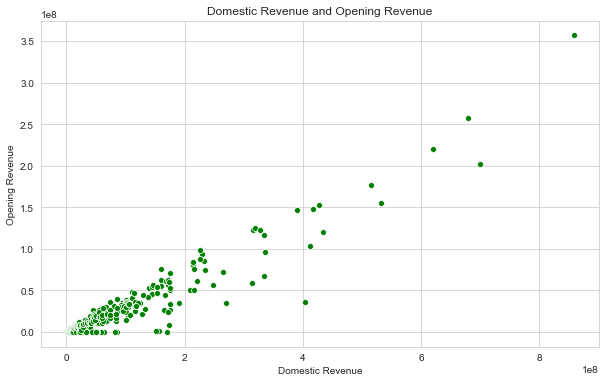

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

sns.scatterplot('domestic_revenue', 'opening_revenue', color='green', data=df_opening_revenue)

plt.title('Domestic Revenue and Opening Revenue')
plt.xlabel('Domestic Revenue')
plt.ylabel('Opening Revenue')

#### Predicting missing values in opening_revenue with KNN method

In [32]:
train = df[df['opening_revenue'].notnull()]
test = df[df['opening_revenue'].isnull()]

train_X = train[['domestic_revenue']]
test_X = test[['domestic_revenue']]
train_Y = train['opening_revenue']

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_Y)
predicted_Y = knn.predict(test_X)

In [34]:
p = 0
for i in df[df['opening_revenue'].isnull()].index:
    df.loc[i, 'opening_revenue'] = predicted_Y[p]
    p = p + 1

### Missing Values in 'opening_theaters'

The number of opening theaters of each movie might be related to the domestic revenue. First, I will check how opening theaters and domestic revenues are related. 

In [35]:
#Convert opening_theaters into float
df['opening_theaters'] = df['opening_theaters'].str.replace(',','')
df['opening_theaters'] = df['opening_theaters'].astype(float)

In [36]:
df_opening_theaters = df[df['opening_theaters'].notnull()]

In [37]:
coef, p_val = stats.pearsonr(df_opening_theaters['opening_theaters'], df_opening_theaters['domestic_revenue'])
print('Pearson Correlation Coefficient:', coef)

Pearson Correlation Coefficient: 0.6333193401094592


Text(0, 0.5, 'Opening Theaters')

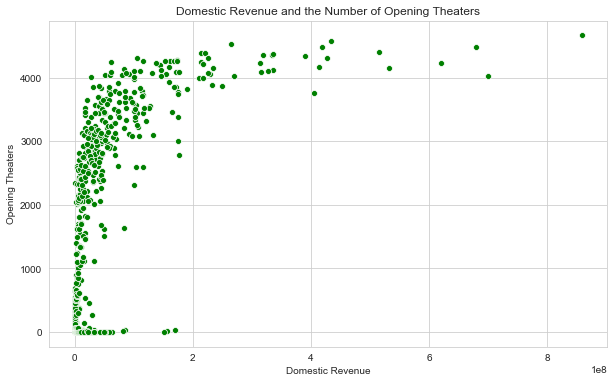

In [38]:
plt.figure(figsize=(10,6))

sns.scatterplot('domestic_revenue', 'opening_theaters', color='green', data=df_opening_theaters)

plt.title('Domestic Revenue and the Number of Opening Theaters')
plt.xlabel('Domestic Revenue')
plt.ylabel('Opening Theaters')

In [39]:
train1 = df[df['opening_theaters'].notnull()]
test1 = df[df['opening_theaters'].isnull()]
train1_X = train1[['domestic_revenue']]
train1_Y = train1['opening_theaters']
test1_X = test1[['domestic_revenue']]

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(train1_X, train1_Y)
predicted1_Y = knn1.predict(test1_X)

p = 0
for i in df[df['opening_theaters'].isnull()].index:
    df.loc[i,'opening_theaters'] = predicted1_Y[p]
    p = p + 1

### Missing Values in budget and MPAA

**budget and MPAA**: There are so many missing values in budget and MPAA. Because the majority of the observation are missing values for these features, I will not replace missing values with any other values.


### Missing Values in release_date

**release_date** is one of our main interest features. Therefore, we will drop rows with missing values in release_date because it's not possible to calculate the promotion period without release_date

In [40]:
df.dropna(subset=['release_date'], axis=0, inplace=True)

In [41]:
df.shape

(1042, 12)

## Converting Format

In [42]:
df.dtypes

title                       object
domestic_revenue           float64
distributor                 object
opening_revenue            float64
opening_theaters           float64
budget                      object
MPAA                        object
genres                      object
release_date                object
trailer                     object
trailer_date        datetime64[ns]
director                    object
dtype: object

#### budget

In [43]:
df['budget'] = df['budget'].str.replace(',','')
df['budget'] = df['budget'].str.replace('$','')
df['budget'] = df['budget'].astype(float)

## Promotion Period

In [44]:
df['release_date'] = df['release_date'].astype('datetime64')

In [45]:
df['promotion_days'] = df['release_date']-df['trailer_date']

In [46]:
df['promotion_days'] = df['promotion_days'].dt.days.astype(int)

In [47]:
df['promotion_days'].describe()

count    1042.000000
mean      108.246641
std       138.786623
min      -411.000000
25%        37.000000
50%        77.000000
75%       139.750000
max      1359.000000
Name: promotion_days, dtype: float64

In [48]:
df = df[(df['promotion_days'] > 0) & (df['promotion_days'] < 365)]

In [49]:
df.shape

(948, 13)

--------------------------------------------------------------------------------------

In [ ]:
from datetime import datetime
from dateutil import relativedelta

df['trailer_date'] = df['trailer_date'].astype(str)
df['movie_date'] = df['movie_date'].astype(str)
df['promotion_months'] = 0

for i in df.index:
    date1 = datetime.strptime(df.loc[i,'trailer_date'], '%Y-%m-%d')
    date2 = datetime.strptime(df.loc[i,'movie_date'], '%Y-%m-%d')
    
    r = relativedelta.relativedelta(date2, date1)
    
    if r.days > 15:
        months = r.months + 1
    else:
        months = r.months
    df.loc[i, 'promotion_months'] = months

---------------------------------------------------------------------------------------------------------

Text(0.5, 0, 'Promotion Days')

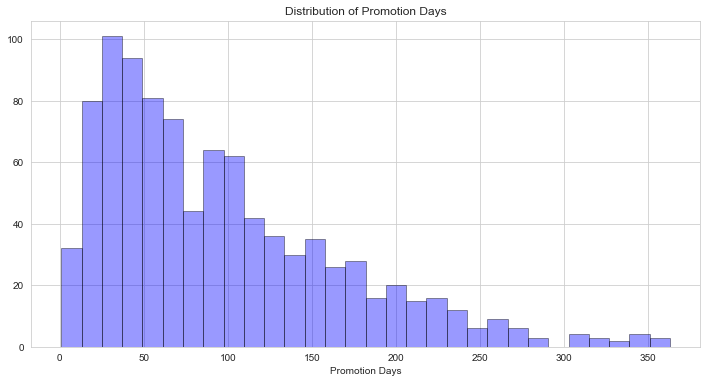

In [50]:
plt.figure(figsize=(12,6))

sns.distplot(df['promotion_days'],hist=True, kde=False, bins=30, color ='blue', hist_kws={'edgecolor':'black'})

plt.title('Distribution of Promotion Days')
plt.xlabel('Promotion Days')

### Cleaning Unnecessary Features

In [51]:
df.drop(['domestic_revenue', 'trailer', 'director'], axis=1, inplace=True)

In [52]:
df.columns

Index(['title', 'distributor', 'opening_revenue', 'opening_theaters', 'budget',
       'MPAA', 'genres', 'release_date', 'trailer_date', 'promotion_days'],
      dtype='object')

## Opening Theaters vs Promotion Days

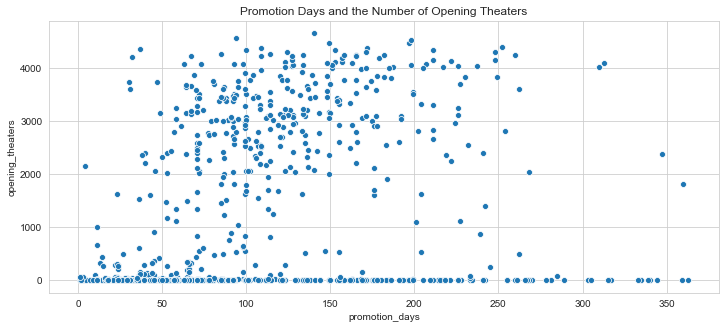

In [53]:
plt.figure(figsize=(12,5))

plt.title('Promotion Days and the Number of Opening Theaters')

sns.scatterplot('promotion_days', 'opening_theaters', data=df)


In [54]:
coef, p_val = stats.pearsonr(df['promotion_days'], df['opening_theaters'])
print('Pearson Correlation Coefficient:', coef, 'p-value:', p_val)

Pearson Correlation Coefficient: 0.34729816353577236 p-value: 2.9265387652190416e-28


In [55]:
df_openingt = df[df['opening_theaters'] > 15]

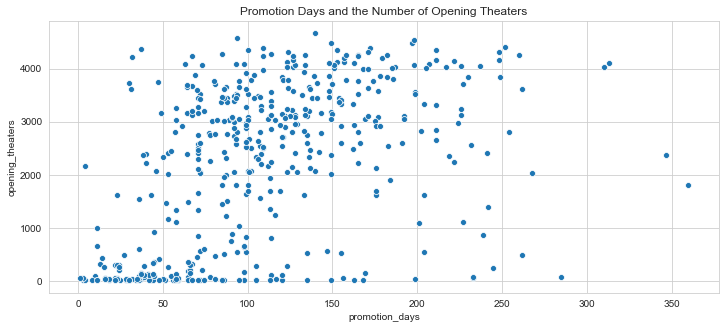

In [56]:
plt.figure(figsize=(12,5))

plt.title('Promotion Days and the Number of Opening Theaters')

sns.scatterplot('promotion_days', 'opening_theaters', data=df_openingt)

In [57]:
coef, p_val = stats.pearsonr(df_openingt['promotion_days'], df_openingt['opening_theaters'])
print('Pearson Correlation Coefficient:', coef, 'p-value:', p_val)

Pearson Correlation Coefficient: 0.4617095790771836 p-value: 4.3581210505250816e-26


## Opening_revenue vs Promotion Days

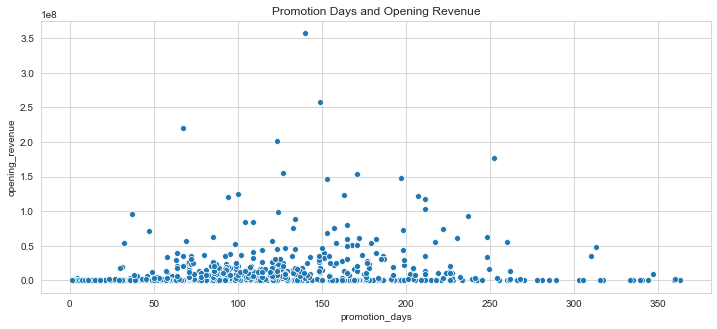

In [58]:
plt.figure(figsize=(12,5))

plt.title('Promotion Days and Opening Revenue')
plt.xlabel('Promotion Days')
plt.ylabel('Opening Revenue')

sns.scatterplot('promotion_days', 'opening_revenue', data=df)

In [59]:
coef, p_val = stats.pearsonr(df['promotion_days'], df['opening_revenue'])
print('Correlation Coefficieint:', coef, 'p-value:', p_val)

Correlation Coefficieint: 0.22380026964142213 p-value: 3.1642728145809213e-12


In [60]:
df_openingr = df[df['opening_revenue'] > 10000]

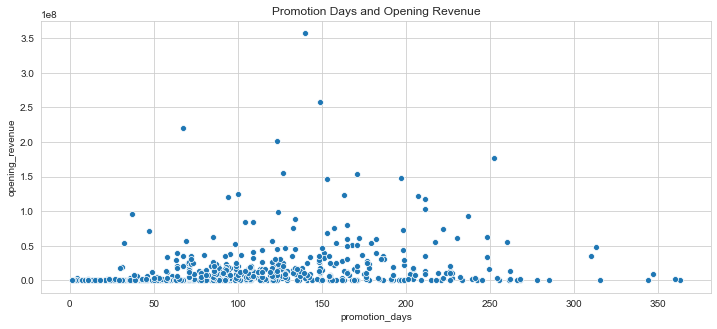

In [61]:
plt.figure(figsize=(12,5))

plt.title('Promotion Days and Opening Revenue')
plt.xlabel('Promotion Days')
plt.ylabel('Opening Revenue')

sns.scatterplot('promotion_days', 'opening_revenue', data=df_openingr)

In [62]:
stats.pearsonr(df_openingr['promotion_days'], df_openingr['opening_revenue'])

(0.2569085375136867, 5.3402897313063486e-12)

## Budget VS Promotion Days

In [63]:
#combining sony pictures releaseing and classics
for i in df.index:
    if (df.loc[i,'distributor'] == 'Sony Pictures Releasing')|(df.loc[i,'distributor'] == 'Sony Pictures Classics'):
        df.loc[i,'distributor'] = 'Sony Pictures'

In [64]:
df_budget = df[df['budget'].notnull()]
df_budget.shape

(241, 10)

In [65]:
df_budget['distributor2'] = None

for i in df_budget.index:
    if (df_budget.loc[i,'distributor'] == 'Walt Disney Studios Motion Pictures')|(df_budget.loc[i,'distributor'] == 'Warner Bros.')|(df_budget.loc[i,'distributor'] == 'Sony Pictures')|(df_budget.loc[i,'distributor'] == 'Universal Pictures')|(df_budget.loc[i,'distributor'] == 'Twentieth Century Fox')|(df_budget.loc[i,'distributor'] == 'Paramount Pictures')|(df_budget.loc[i,'distributor'] == 'Lionsgate'):
        df_budget.loc[i,'distributor2'] = df_budget.loc[i,'distributor']
    else:
        df_budget.loc[i,'distributor2'] = 'else'

c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


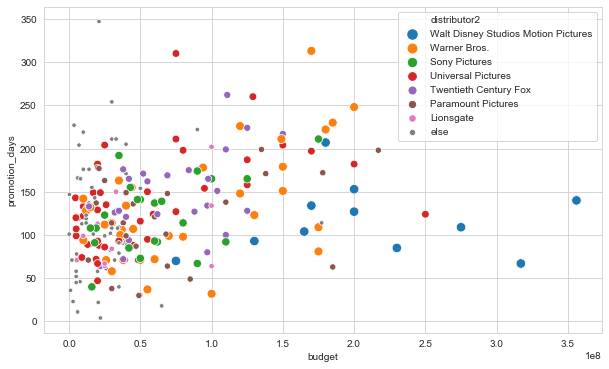

In [66]:
dist_order=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures'
           ,'Universal Pictures','Twentieth Century Fox','Paramount Pictures',
           'Lionsgate','else']
width = 10
height = 6
plt.figure(figsize=(width, height))

sns.scatterplot('budget', 'promotion_days', hue='distributor2', hue_order=dist_order, size='distributor2', size_order=dist_order, sizes=(20,90), data=df_budget)
plt.legend(loc='upper right', ncol=1)

In [67]:
coef,p_val = stats.pearsonr(df_budget['budget'], df_budget['promotion_days'])
print('Correlation Coefficient:', coef, 'p-value:', p_val)

Correlation Coefficient: 0.29353316461567114 p-value: 3.5574707639001662e-06


In [68]:
major_dist=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures','Universal Pictures','Twentieth Century Fox','Paramount Pictures','Lionsgate']

df_walt = df_budget[df_budget['distributor']=='Walt Disney Studios Motion Pictures']
df_warner = df_budget[df_budget['distributor']=='Warner Bros.']
df_sony = df_budget[df_budget['distributor']=='Sony Pictures']
df_universal = df_budget[df_budget['distributor']=='Universal Pictures']
df_20th = df_budget[df_budget['distributor']=='Twentieth Century Fox']
df_para = df_budget[df_budget['distributor']=='Paramount Pictures']
df_lion = df_budget[df_budget['distributor']=='Lionsgate']
df_else = df_budget[~df_budget['distributor'].isin(major_dist)]

Text(1028.5163043478262, 0.5, '')

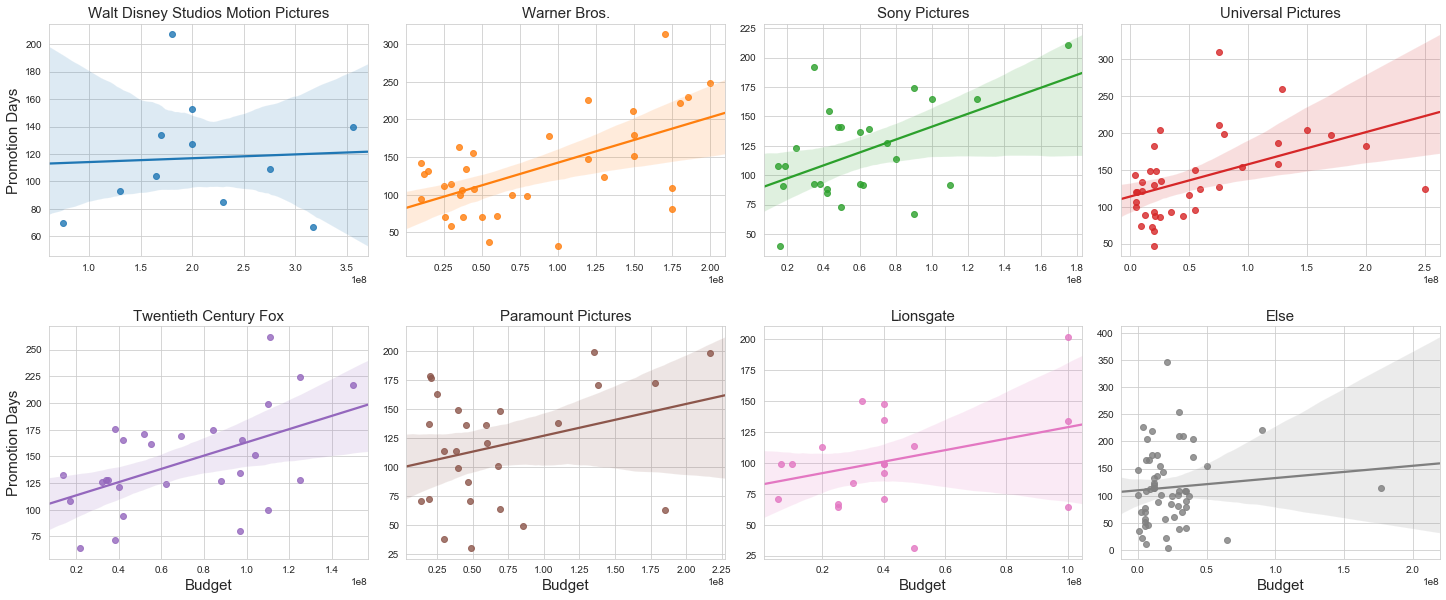

In [69]:
f,axs=plt.subplots(2,4, figsize=(20,8))
f.tight_layout()
f.subplots_adjust(hspace=.3)

sns.regplot('budget', 'promotion_days', data=df_walt, ax=axs[0,0])
axs[0,0].set_title('Walt Disney Studios Motion Pictures',fontsize=15)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Promotion Days',fontsize=15)

sns.regplot('budget', 'promotion_days', data=df_warner, ax=axs[0,1])
axs[0,1].set_title('Warner Bros.',fontsize=15)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_sony, ax=axs[0,2])
axs[0,2].set_title('Sony Pictures',fontsize=15)
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_universal, ax=axs[0,3])
axs[0,3].set_title('Universal Pictures',fontsize=15)
axs[0,3].set_xlabel('')
axs[0,3].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_20th, ax=axs[1,0])
axs[1,0].set_title('Twentieth Century Fox',fontsize=15)
axs[1,0].set_xlabel('Budget',fontsize=15)
axs[1,0].set_ylabel('Promotion Days',fontsize=15)

sns.regplot('budget', 'promotion_days', data=df_para, ax=axs[1,1])
axs[1,1].set_title('Paramount Pictures',fontsize=15)
axs[1,1].set_xlabel('Budget',fontsize=15)
axs[1,1].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_lion, ax=axs[1,2])
axs[1,2].set_title('Lionsgate',fontsize=15)
axs[1,2].set_xlabel('Budget',fontsize=15)
axs[1,2].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_else, ax=axs[1,3])
axs[1,3].set_title('Else',fontsize=15)
axs[1,3].set_xlabel('Budget',fontsize=15)
axs[1,3].set_ylabel('')

In [70]:
dist_dict = {'Walt Disney':df_walt, 'Warner Bros.':df_warner,'Sony Pictures':df_sony,
             'Universal Pictures':df_universal, 'Twentieth Century Fox':df_20th,'Paramount Pictures':df_para,
             'Lionsgate':df_lion,'Else':df_else}

df_corr = pd.DataFrame(columns=['Distributor','Corr Coef','P-value'])
i = 0
for key,value in dist_dict.items():
    coef, p_val = stats.pearsonr(value['budget'],value['promotion_days'])
    df_corr.loc[i,'Distributor'] = key
    df_corr.loc[i,'Corr Coef'] = coef
    df_corr.loc[i,'P-value'] = p_val
    i += 1
df_corr

,Distributor,Corr Coef,P-value
0,Walt Disney,0.0554667,0.871324
1,Warner Bros.,0.582318,0.000302591
2,Sony Pictures,0.507619,0.00811652
3,Universal Pictures,0.472027,0.00241481
4,Twentieth Century Fox,0.509443,0.00664368
5,Paramount Pictures,0.307583,0.118587
6,Lionsgate,0.339473,0.155053
7,Else,0.0874983,0.513682


### Distributors and Promotion Days

In [71]:
df['distributor'].value_counts().head(15)

Sony Pictures                          62
IFC Films                              58
Warner Bros.                           53
Magnolia Pictures                      44
Universal Pictures                     43
Lionsgate                              38
Twentieth Century Fox                  32
Well Go USA Entertainment              32
Paramount Pictures                     31
Walt Disney Studios Motion Pictures    23
A24                                    22
The Orchard                            21
Strand Releasing                       18
Roadside Attractions                   18
STX Entertainment                      18
Name: distributor, dtype: int64

In [72]:
df_dist = df[(df['distributor']=='Walt Disney Studios Motion Pictures')|(df['distributor']=='Warner Bros.')|(df['distributor']=='Sony Pictures')|(df['distributor']=='Universal Pictures')|(df['distributor']=='The Orchard')|(df['distributor']=='IFC Films')|(df['distributor']=='Well Go USA Entertainment')|(df['distributor']=='Strand Releasing')]

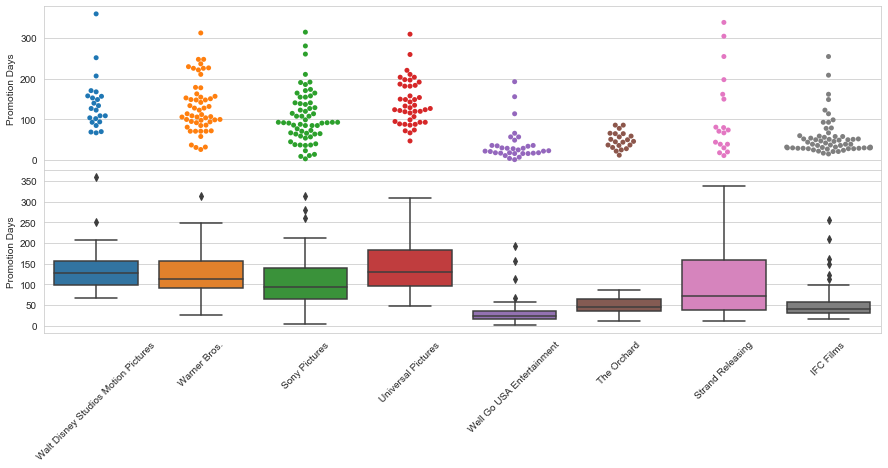

In [73]:
dist_order=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures'
           ,'Universal Pictures','Well Go USA Entertainment',
           'The Orchard','Strand Releasing','IFC Films']

f,ax=plt.subplots(2,1,figsize=(15,6))
f.subplots_adjust(hspace=0)
sns.catplot('distributor', 'promotion_days', kind='swarm', order=dist_order, data=df_dist, ax=ax[0])
ax[0].set_xticklabels([])
ax[0].set_xlabel('')
ax[0].set_ylabel('Promotion Days')
sns.catplot('distributor', 'promotion_days', kind="box", order=dist_order, data=df, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize='medium')
ax[1].set_xlabel('')
ax[1].set_ylabel('Promotion Days')

plt.close(2)
plt.close(3)

## MPAA vs Promotion Days

In [74]:
df_MPAA = df[df['MPAA'].notnull()]

In [75]:
mpaa_counts = df_MPAA['MPAA'].value_counts().to_frame()
mpaa_counts.rename(columns={'MPAA':'Counts'}, inplace=True)
mpaa_counts.index.name='MPAA'
mpaa_counts.style.background_gradient('summer_r')

,Counts
MPAA,
R,324
PG-13,214
PG,92
Not Rated,7
G,5


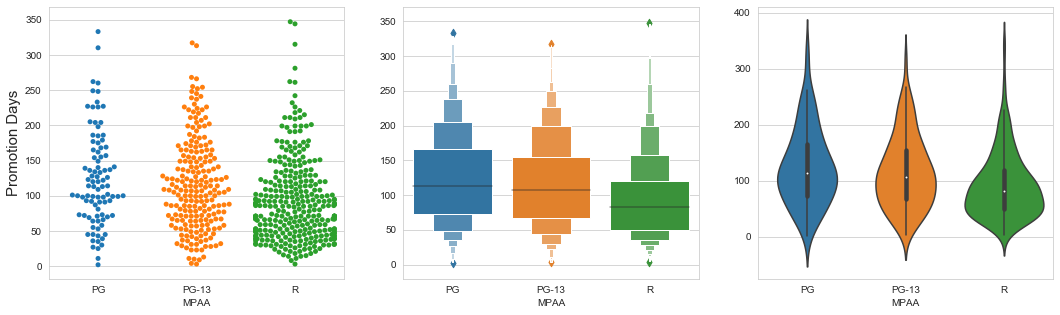

In [76]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('MPAA', 'promotion_days', order=['PG', 'PG-13', 'R'], kind="swarm", data=df_MPAA, ax=ax[0])
ax[0].set_ylabel('Promotion Days', fontsize=15)
sns.catplot('MPAA', 'promotion_days', order=['PG', 'PG-13', 'R'], kind="boxen", data=df_MPAA, ax=ax[1])
ax[1].set_ylabel('')
sns.catplot('MPAA', 'promotion_days', order=['PG', 'PG-13', 'R'], kind="violin", data=df_MPAA, ax=ax[2])
ax[2].set_ylabel('')

plt.close(2)
plt.close(3)
plt.close(4)

#### PG and PG-13

In [77]:
t_stat0,p_val0 = stats.ttest_ind(df_MPAA[df_MPAA['MPAA']=='PG']['promotion_days'],df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'])
ks_stat0, p_val1=stats.ks_2samp(df_MPAA[df_MPAA['MPAA']=='PG']['promotion_days'],df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'])
print("t-statistic:", t_stat0, 'p-value:', p_val0)
print("KS-statistic:", ks_stat0, 'p-value:', p_val1)

t-statistic: 1.0793963102461517 p-value: 0.2812667397489795
KS-statistic: 0.10371800081267778 p-value: 0.45484841118492003


#### PG-13 and R

In [78]:
t_stat1,p_val2 =stats.ttest_ind(df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'], df_MPAA[df_MPAA['MPAA']=='R']['promotion_days'])
ks_stat1, p_val3=stats.ks_2samp(df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'], df_MPAA[df_MPAA['MPAA']=='R']['promotion_days'])
print("t-statistic:", t_stat1, 'p-value:', p_val2)
print("KS-statistic:", ks_stat1, 'p-value:', p_val3)

t-statistic: 4.466644413991094 p-value: 9.696172621445575e-06
KS-statistic: 0.21506865120572285 p-value: 1.0274177670965834e-05


## genres vs Promotion Days

In [84]:
df['genres'].unique()

array(['Action,Adventure,Drama,Sci-Fi',
       'Comedy,Crime,Drama,Mystery,Thriller',
       'Action,Adventure,Fantasy,Sci-Fi',
       'Action,Adventure,Comedy,Fantasy', 'Adventure,Family,Fantasy',
       'Drama,Sci-Fi,Thriller', 'Comedy,Drama',
       'Action,Adventure,Comedy,Family,Mystery,Sci-Fi',
       'Action,Adventure,Animation,Family,Fantasy',
       'Action,Crime,Thriller', 'Horror,Mystery,Thriller',
       'Action,Horror,Sci-Fi,Thriller', 'Action,Crime,Drama,Thriller',
       'Action,Adventure,Sci-Fi', 'Drama,Horror,Mystery,Thriller',
       'Biography,Drama', 'Animation,Drama,Horror,Sci-Fi',
       'Comedy,Drama,Romance', 'Documentary', 'Action,Sci-Fi,Thriller',
       'Drama', 'Fantasy,Thriller', 'Comedy', 'Action,Adventure,Fantasy',
       'Adventure,Drama,Romance', 'Thriller', 'Documentary,War',
       'Action,Documentary,Drama', 'Action,Adventure,Comedy',
       'Biography,Documentary', 'Documentary,History,War', 'Drama,Music',
       'Drama,Romance', 'Drama,History,Roma

In [86]:
len(df['genres'].unique())

324

In [85]:
genres_counts = df['genres'].value_counts().to_frame()
genres_counts.rename(columns={'genres':'counuts'}, inplace=True)
genres_counts.index.name = 'Genres'
genres_counts

,counuts
Genres,
Documentary,75
Drama,73
"Comedy,Drama",45
Comedy,27
"Comedy,Drama,Romance",24
...,...
"Comedy,Drama,History",1
"Documentary,History,Sci-Fi",1
"Adventure,Family,Fantasy,Sci-Fi",1


In [89]:
counts = dict()

for i in df.index:
    for bgenre in df.loc[i, 'genres'].split(','):
        if bgenre not in counts:
            counts[bgenre] = 1
        else:
            counts[bgenre] = counts[bgenre] + 1

{'Action': 186, 'Adventure': 148, 'Drama': 539, 'Sci-Fi': 93, 'Comedy': 250, 'Crime': 130, 'Mystery': 113, 'Thriller': 238, 'Fantasy': 108, 'Family': 82, 'Animation': 54, 'Horror': 107, 'Biography': 113, 'Romance': 138, 'Documentary': 127, 'War': 49, 'History': 60, 'Music': 42, 'Sport': 21, 'Western': 15, 'Musical': 18}


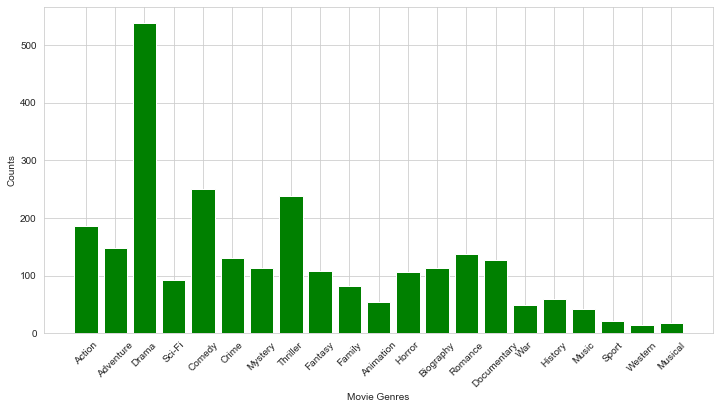

In [101]:
plt.figure(figsize=(12,6))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Movie Genres')
plt.ylabel('Counts')
print(counts)

In [104]:
# Creating columns for each genre
for genre in counts.keys():
    df[genre] = None
    for i in df.index:
        if genre in df.loc[i, 'genres']:
            df.loc[i, genre] = 1
        else:
            df.loc[i, genre] = 0

In [112]:
df.columns

Index(['title', 'distributor', 'opening_revenue', 'opening_theaters', 'budget',
       'MPAA', 'genres', 'release_date', 'trailer_date', 'promotion_days',
       'Action', 'Adventure', 'Drama', 'Sci-Fi', 'Comedy', 'Crime', 'Mystery',
       'Thriller', 'Fantasy', 'Family', 'Animation', 'Horror', 'Biography',
       'Romance', 'Documentary', 'War', 'History', 'Music', 'Sport', 'Western',
       'Musical'],
      dtype='object')

In [127]:
df_genres = pd.DataFrame(columns=['t-statistic','p-value(t)','KS-statistic','p-value(KS)'],index=df.columns[10:])

for genre in df.columns[10:]:
    t_stat,p_val0 = stats.ttest_ind(df[df[genre]==1]['promotion_days'],df[df[genre]==0]['promotion_days'])
    ks_stat, p_val1 = stats.ks_2samp(df[df[genre]==1]['promotion_days'],df[df[genre]==0]['promotion_days'])
    df_genres.loc[genre,'t-statistic'] = t_stat
    df_genres.loc[genre,'p-value(t)'] = p_val0
    df_genres.loc[genre,'KS-statistic'] = ks_stat
    df_genres.loc[genre,'p-value(KS)'] = p_val1    
    
df_genres

,t-statistic,p-value(t),KS-statistic,p-value(KS)
Action,3.90009,0.000102953,0.248709,1.26197e-08
Adventure,6.18204,9.39735e-10,0.319189,8.62987e-12
Drama,-2.21656,0.0268903,0.10229,0.014048
Sci-Fi,4.90371,1.10648e-06,0.318129,4.86562e-08
Comedy,-1.05564,0.291402,0.0588424,0.523317
Crime,0.939264,0.347835,0.109799,0.123084
Mystery,-0.108211,0.913851,0.0862699,0.422877
Thriller,1.80372,0.0715925,0.137105,0.00216474
Fantasy,5.29845,1.45334e-07,0.288889,1.47768e-07
Family,4.88847,1.19339e-06,0.310736,6.45375e-07


#### Action

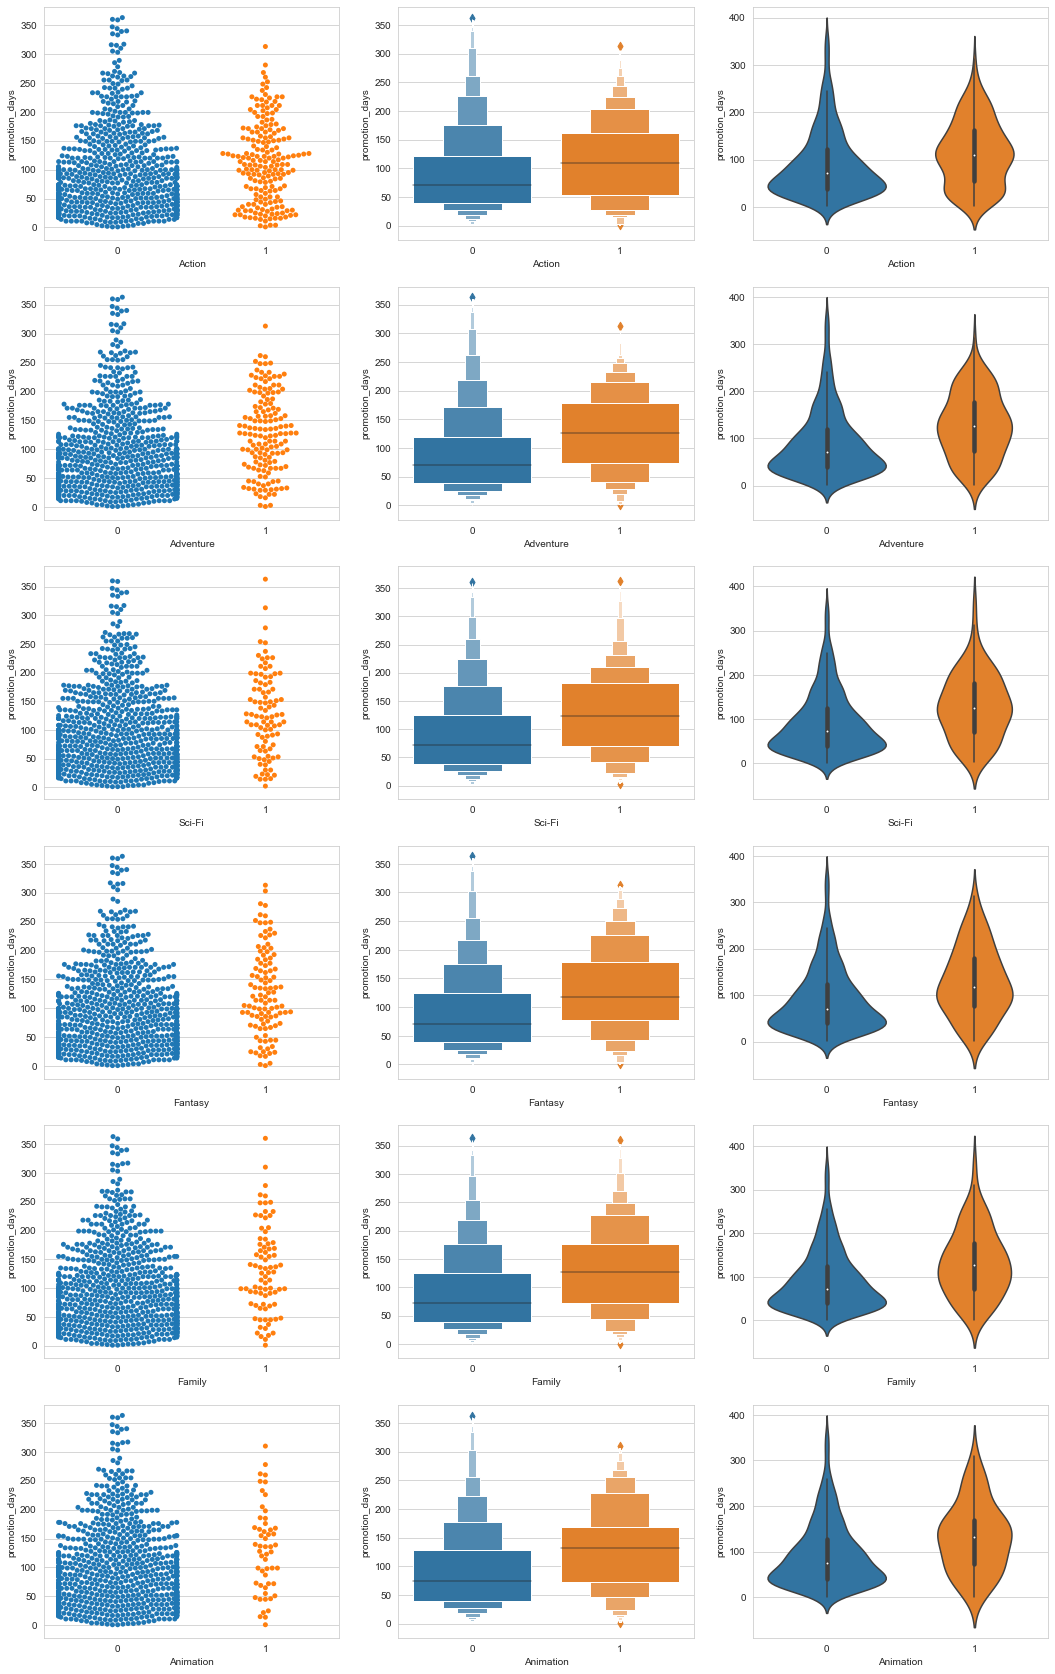

In [136]:
f, ax = plt.subplots(6,3,figsize=(18,30))

sns.catplot('Action', 'promotion_days', kind="swarm", data=df, ax=ax[0,0])
sns.catplot('Action', 'promotion_days', kind="boxen", data=df, ax=ax[0,1])
sns.catplot('Action', 'promotion_days', kind="violin", data=df, ax=ax[0,2])

sns.catplot('Adventure', 'promotion_days', kind="swarm", data=df, ax=ax[1,0])
sns.catplot('Adventure', 'promotion_days', kind="boxen", data=df, ax=ax[1,1])
sns.catplot('Adventure', 'promotion_days', kind="violin", data=df, ax=ax[1,2])

sns.catplot('Sci-Fi', 'promotion_days', kind="swarm", data=df, ax=ax[2,0])
sns.catplot('Sci-Fi', 'promotion_days', kind="boxen", data=df, ax=ax[2,1])
sns.catplot('Sci-Fi', 'promotion_days', kind="violin", data=df, ax=ax[2,2])

sns.catplot('Fantasy', 'promotion_days', kind="swarm", data=df, ax=ax[3,0])
sns.catplot('Fantasy', 'promotion_days', kind="boxen", data=df, ax=ax[3,1])
sns.catplot('Fantasy', 'promotion_days', kind="violin", data=df, ax=ax[3,2])

sns.catplot('Family', 'promotion_days', kind="swarm", data=df, ax=ax[4,0])
sns.catplot('Family', 'promotion_days', kind="boxen", data=df, ax=ax[4,1])
sns.catplot('Family', 'promotion_days', kind="violin", data=df, ax=ax[4,2])

sns.catplot('Animation', 'promotion_days', kind="swarm", data=df, ax=ax[5,0])
sns.catplot('Animation', 'promotion_days', kind="boxen", data=df, ax=ax[5,1])
sns.catplot('Animation', 'promotion_days', kind="violin", data=df, ax=ax[5,2])

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
plt.close(11)
plt.close(12)
plt.close(13)
plt.close(14)
plt.close(15)
plt.close(16)
plt.close(17)
plt.close(18)
plt.close(19)

#### Action

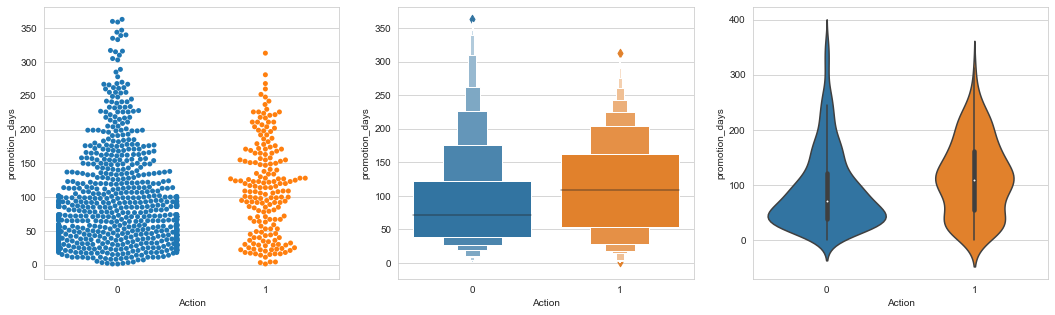

In [130]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Action', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Action', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Action', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Adventure

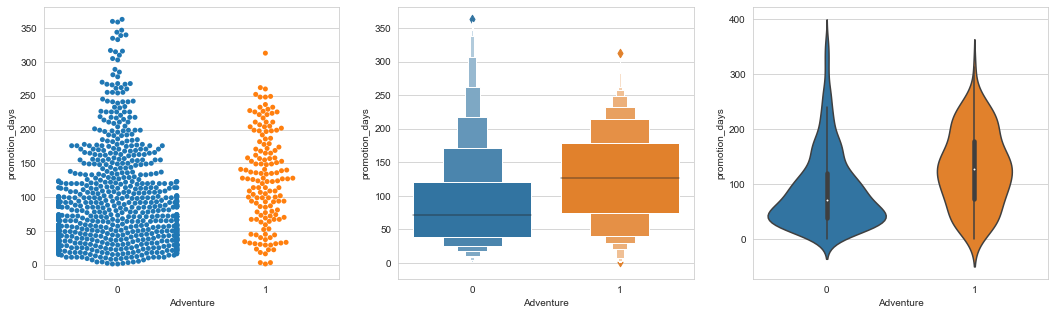

In [143]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Adventure', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Adventure', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Adventure', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Fantasy

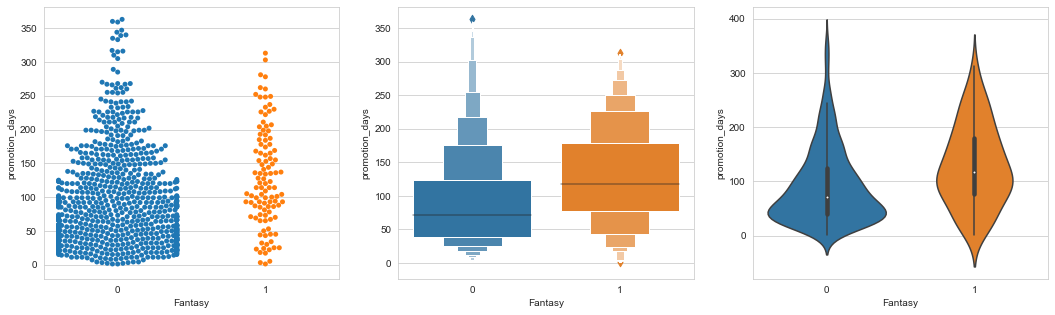

In [145]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Fantasy', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Fantasy', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Fantasy', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Sci-Fi

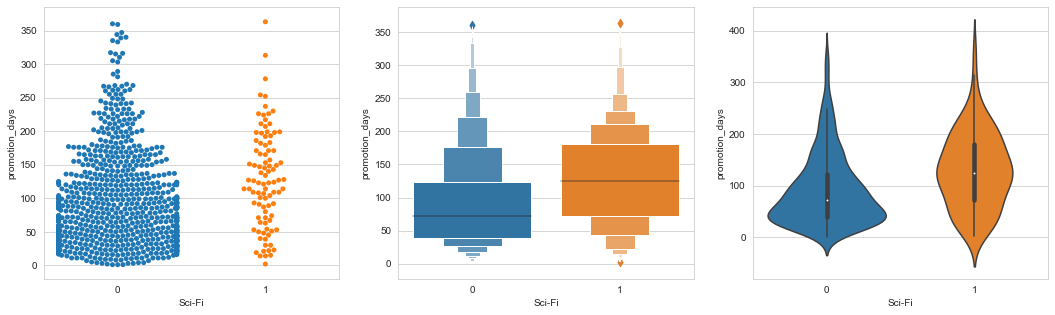

In [641]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Sci-Fi', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Sci-Fi', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Sci-Fi', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Thriller

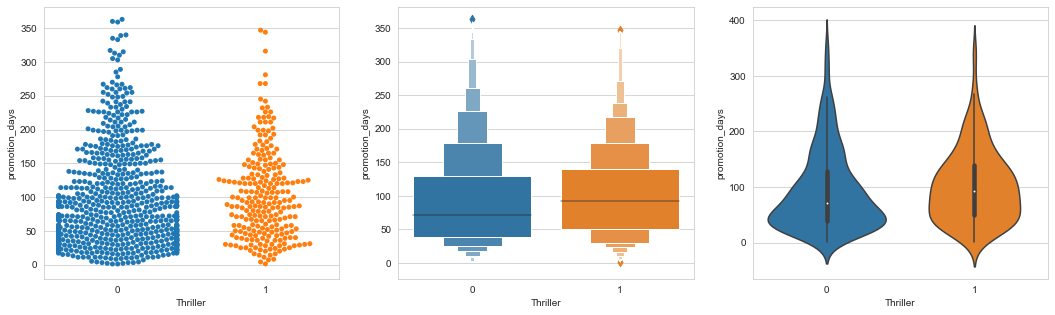

In [643]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Thriller', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Thriller', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Thriller', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### War

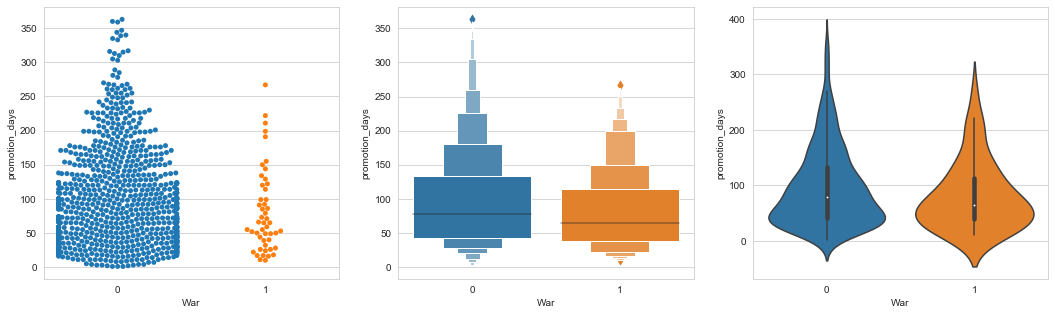

In [645]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('War', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('War', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('War', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Comedy

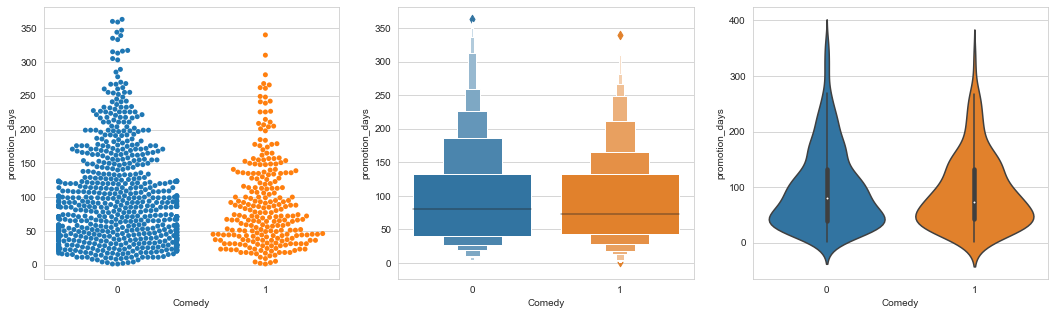

In [647]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Comedy', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Comedy', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Comedy', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Family

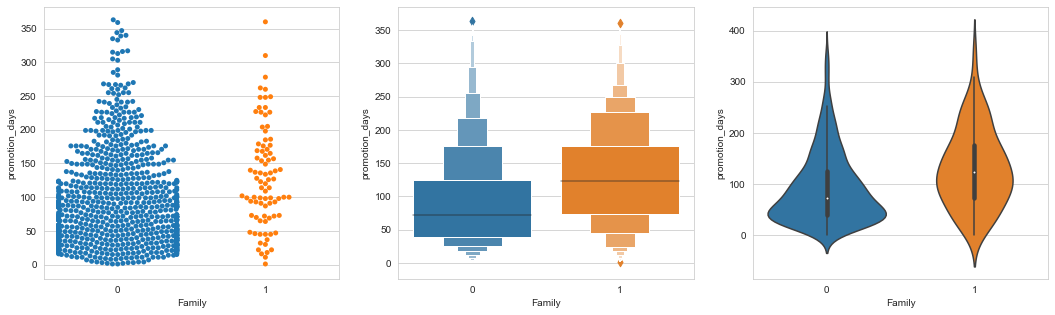

In [649]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Family', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Family', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Family', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Romance

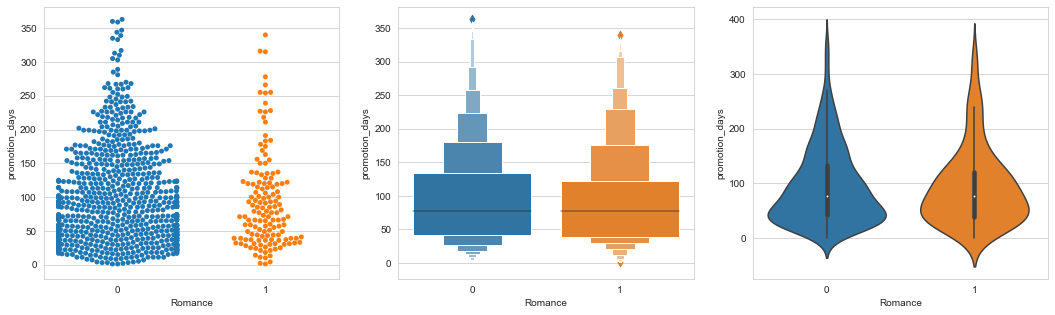

In [651]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Romance', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Romance', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Romance', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Horror

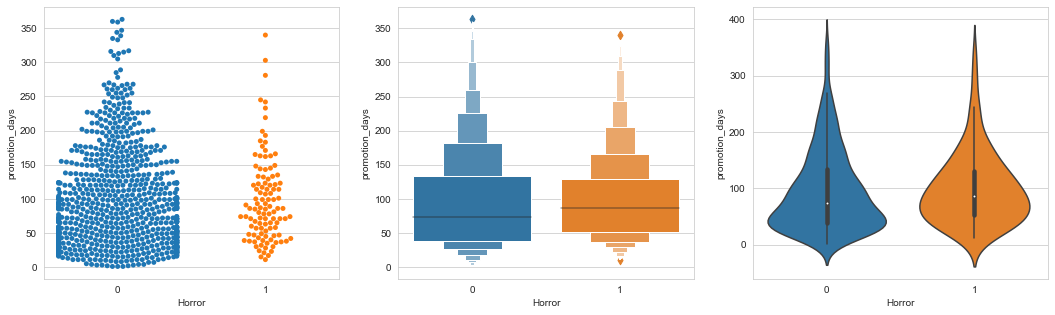

In [653]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Horror', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Horror', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Horror', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Drama

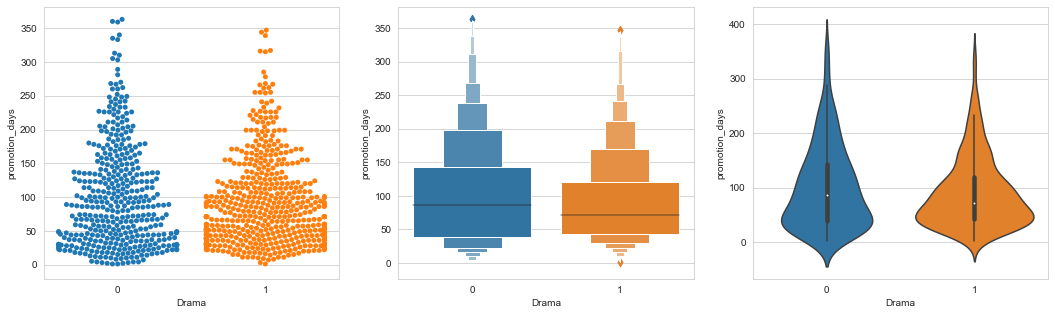

In [655]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Drama', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Drama', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Drama', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Animation

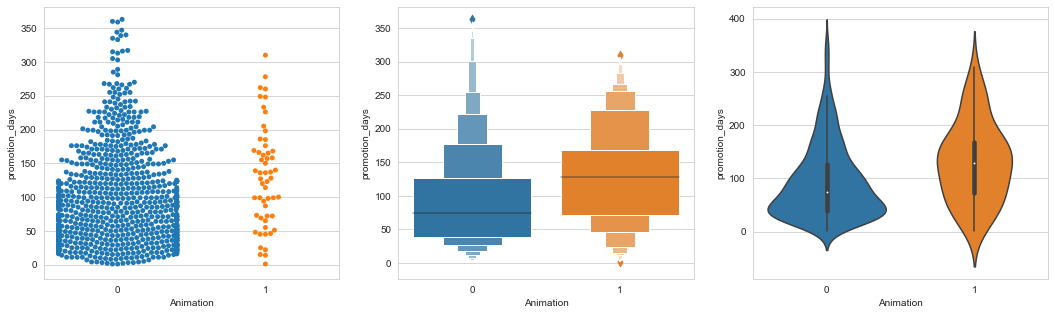

In [657]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Animation', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Animation', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Animation', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Crime

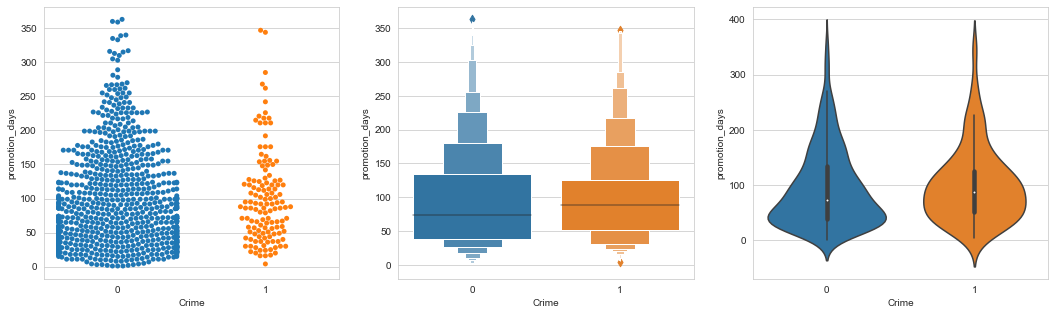

In [659]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Crime', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Crime', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Crime', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Mystery

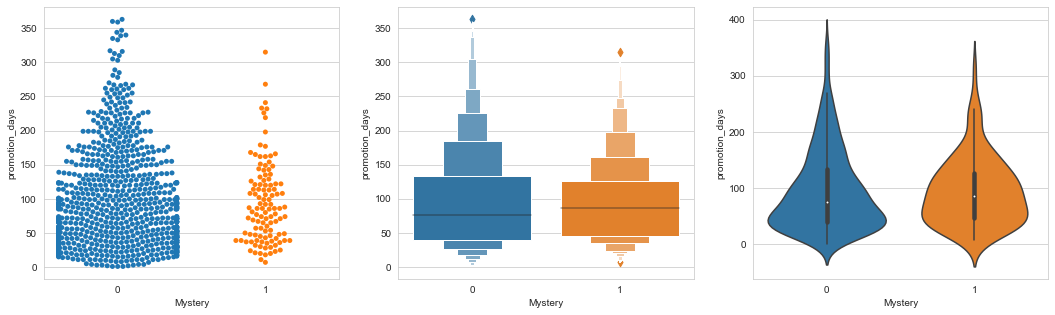

In [661]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Mystery', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Mystery', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Mystery', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### History

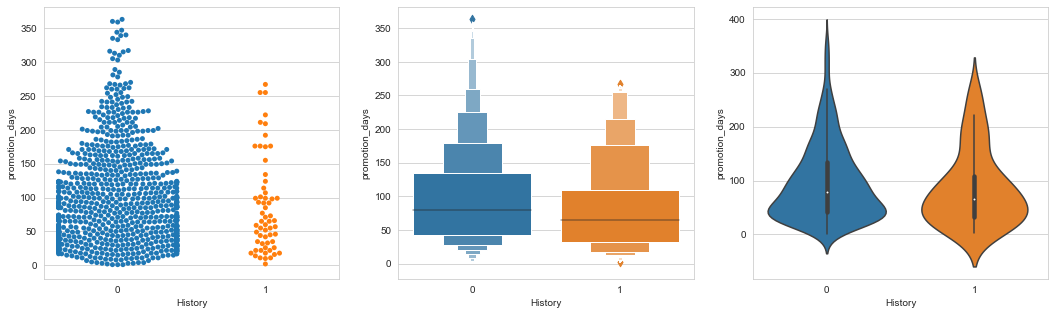

In [663]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('History', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('History', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('History', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Documentary

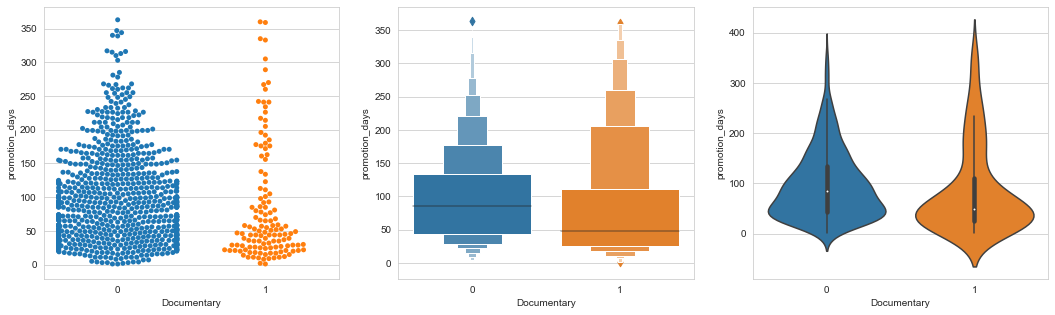

In [665]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Documentary', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Documentary', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Documentary', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)

#### Biography

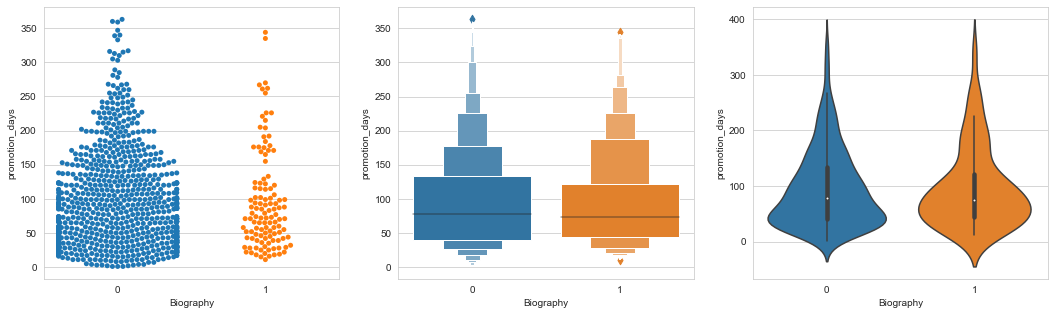

In [667]:
f, ax = plt.subplots(1,3,figsize=(18,5))

sns.catplot('Biography', 'promotion_days', kind="swarm", data=df, ax=ax[0])
sns.catplot('Biography', 'promotion_days', kind="boxen", data=df, ax=ax[1])
sns.catplot('Biography', 'promotion_days', kind="violin", data=df, ax=ax[2])

plt.close(2)
plt.close(3)
plt.close(4)